## 1. Понимание бизнеса

### 1.1 Цель
Предсказать вид вина

### 1.2 Описание

Два набора данных относятся к красному и белому вариантам португальского вина «Vinho Verde». Ссылка [Cortez et al., 2009]. Из-за проблем с конфиденциальностью и логистикой доступны только физико-химические (входные) и органолептические (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. д.).


## 2. Data understanding

### 2.1 Important Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2.2 Загрузка данных

In [84]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 2.3 Статистика и визуализация

#### Переменные

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (качество вина от плохого 0 до отличного 10)
13 - type (белое или красное вино)

In [87]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Построим тепловую карту для оценки взаимосвязей признаков

Перед этим преобразуем категориальный признак Type через LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder()
le.fit(df['type'])
df['type'] = pd.Series(data=le.transform(df['type']))

In [89]:
corr = df.corr()

<AxesSubplot:>

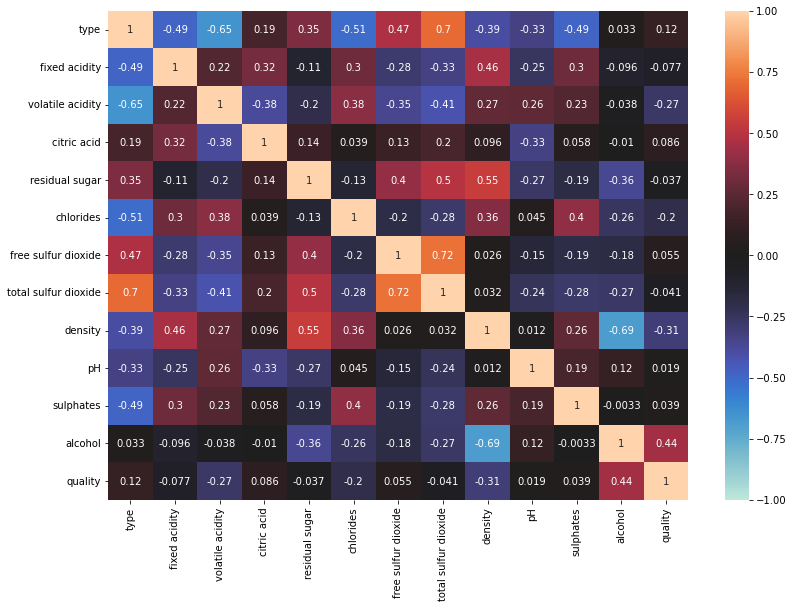

In [90]:
plt.subplots(figsize=(13,9))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0)

#### Посмотрим на распределение таргетной переменной

In [91]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

(array([  30.,    0.,    0.,  216.,    0.,    0., 2138.,    0.,    0.,
           0., 2836.,    0.,    0., 1079.,    0.,    0.,  193.,    0.,
           0.,    5.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6,
        6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 20 artists>)

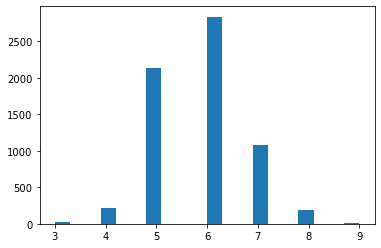

In [92]:
plt.hist(df['quality'], bins=20)

Видим, что классы не сбалансированны

#### BoxPlot визуализация


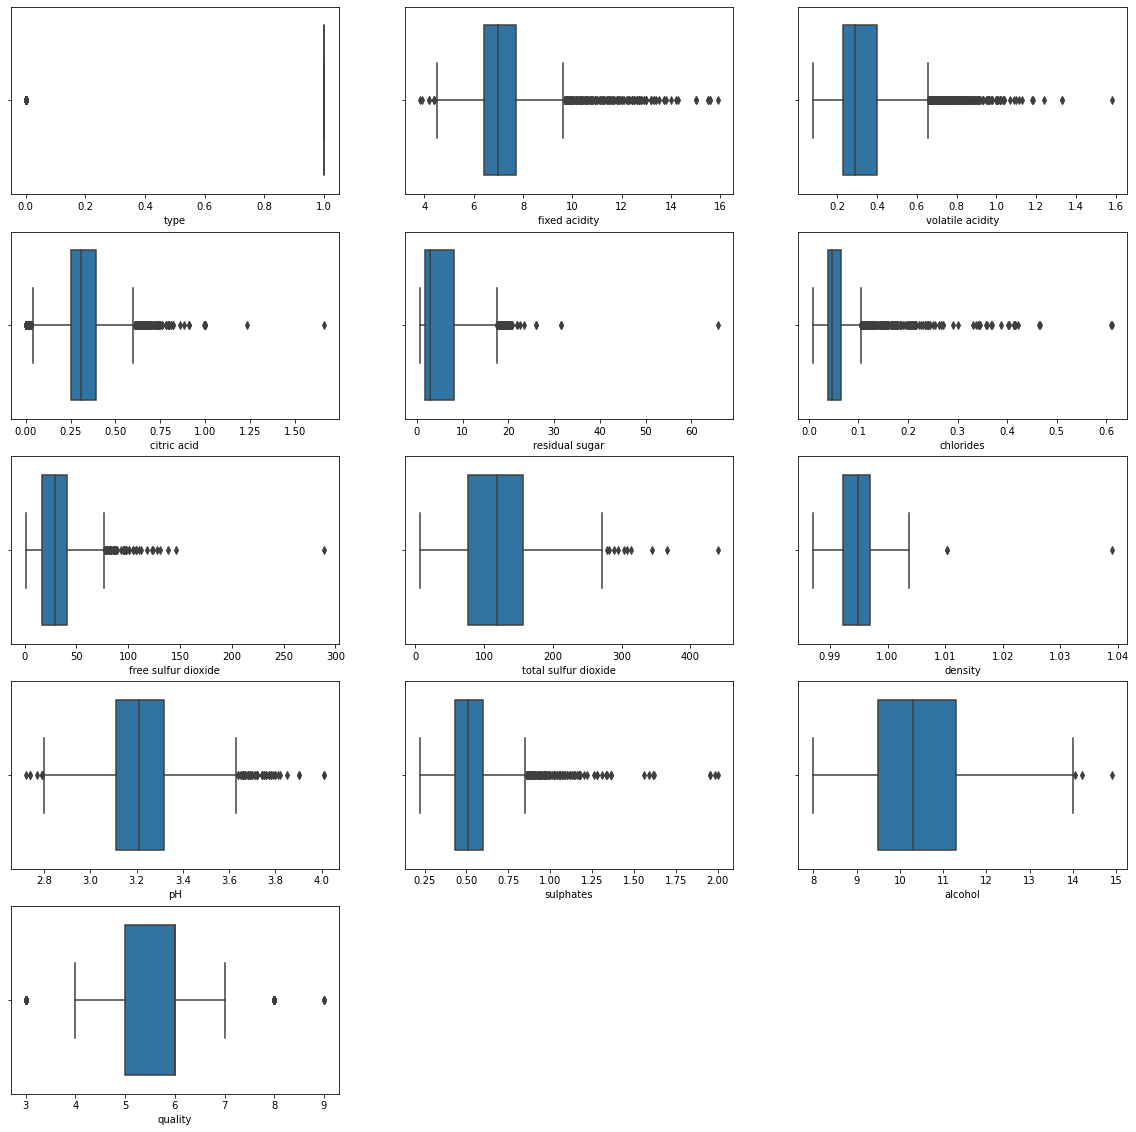

In [112]:
columns = df.columns

plt.figure(figsize=(20, 20))
for i in range(len(columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df[columns[i]], orient='V')


#### Видим большое количесто выбросов  признаков Free sulfur dioxide и Total sulfur dioxide. Однако взаимосвязь данных признаков с целевой переменной близка к нулю, что можно увидеть из карты корреляций

## 3. Data preparation

### 3.1 Выделим ключевую переменную

In [94]:
y = df['quality']
X = df.drop(columns=['quality'])

### 3.2 Избавимся от пропусков

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


Как мы можем видеть из графиков boxplot, большинство наших признаков имеют выбросы, в том числе признаки с пропусками.
В этом случае заменим пропуски медианными значениями, которые не подвержены влиянию выбросов

In [118]:
feat_ = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']

for col in feat_:
    median = X[col].median()
    X[col] = X[col].fillna(median)

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
dtypes: float64(11), int32(1)
memory usage: 583.8 KB


### 3.2 Стандартизируем значения признаков, так как в данный момент признаки между собой имеют огромный разброс значений

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
ss = StandardScaler()
X_scal = ss.fit_transform(X)

### 3.3 Подготовка данных для обучение, разделение на train, test

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [139]:
x_train, x_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.3, random_state=42)

## 4. Моделирование

#### Будем использовать RandomForest для многоклассовой классификации, данные будем разбивать на кросс валидации

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=30)

In [161]:
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, x_train, y_train, cv=skf)

In [163]:
scores

array([0.65054945, 0.66593407, 0.66226623, 0.66116612, 0.6589659 ])

### 4.1 Подберем гиперпараметры на RandomizeSearchCV

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [202]:
model = RandomForestClassifier()
params = {'n_estimators':[10,25,50,100,150,200], 'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11,13,15,17,19],
         'max_features':[5,6,7,8,9,10,11,12,13], 'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
search = RandomizedSearchCV(model, params, cv=10, scoring='accuracy')

In [203]:
search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_features': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   scoring='accuracy')

In [204]:
search.best_score_

0.6584479837343273

#### Значимость признаков

In [209]:
best_model = search.best_estimator_

In [213]:
feat = best_model.feature_importances_

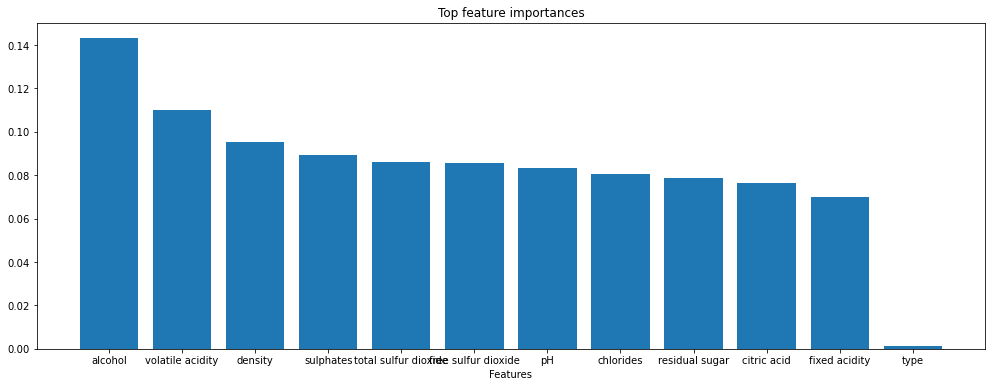

In [227]:
signs = pd.Series(feat)

signs.index = pd.Series(X.columns)

plt.figure(figsize=(17,6))
plt.bar(signs.sort_values(ascending=False).index, signs.sort_values(ascending=False))
plt.title('Top feature importances')
plt.xlabel('Features')
plt.show()